<a href="https://colab.research.google.com/github/ahmedmusawir/modern-react-agents-youtube/blob/main/VIDEO_3_STEP_4_Modular_Email_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

### INSTALLATIONS

In [ ]:
!pip install -q langchain
!pip install -q langchain_community
!pip install -q langgraph
!pip install -q resend

!pip install -q langchain_openai
!pip install -q langchain-anthropic
!pip install -q langchain-groq
!pip install -q langchain-google-genai

!pip show langchain
!pip show langgraph

Name: langchain
Version: 0.3.18
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community
Name: langgraph
Version: 0.2.70
Summary: Building stateful, multi-actor applications with LLMs
Home-page: https://www.github.com/langchain-ai/langgraph
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-sdk
Required-by: 


### LOADING API KEY

In [ ]:
import os
os.environ["OPENAI_API_KEY"] ="sk-proj-ulX3z********JKFU8CUAYWg7y8Ge8pROt"
os.environ["ANTHROPIC_API_KEY"]="sk-ant-*****Yrs4bmmTp3hDmAaVang-IsYoZAAA"
os.environ["GOOGLE_API_KEY"] ="AIzaSy***********************MTJMtvzSDmziA"
os.environ["GROQ_API_KEY"] ="gsk_DI**************ifbW5XXVUtlxWcRRXwc3EDrc"
os.environ["RESEND_API_KEY"] = "re_6PfLRE****************UrruN6uc5EwdJavr"


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"ReAct AGENT EXPERIMENTS"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "lsv2_pt_4ce9*********cd65c_37d096d1b5"

## TESTING THE MODEL RESPONSE

### OPENAI

In [ ]:
from langchain_openai import ChatOpenAI
import pprint

# Create an instance of the OpenAI class
# llm = ChatOpenAI(model="gpt-4o")
llm = ChatOpenAI(model="o1-mini")
# llm = ChatOpenAI(model="o1-preview")

# Generate text
prompt = "Who is Sam Altman (in one sentence)"
response = llm.invoke(prompt)
# print(response)
pprint.pprint(response.content)

('Sam Altman is an American entrepreneur and investor, best known as the CEO '
 'of OpenAI and the former president of the startup accelerator Y Combinator.')


### ANTHROPIC

In [ ]:
from langchain_anthropic import ChatAnthropic
from langchain.prompts import ChatPromptTemplate

claude_model = ChatAnthropic(
    model="claude-3-5-sonnet-20240620",
    api_key=os.getenv("ANTHROPIC_API_KEY"),  # Pass the API key here
    temperature=0,
    max_tokens=1024,
    timeout=None,
    max_retries=2,
    # other params...
)

prompt = "Who is Sam Altman (in one sentence)"
response = claude_model.invoke(prompt)

# print(response.content)
pprint.pprint(response.content)


('Sam Altman is an American entrepreneur and investor, best known as the CEO '
 'of OpenAI and former president of Y Combinator, who has played a significant '
 'role in shaping the tech industry and advancing artificial intelligence '
 'research.')


### GROQ - LLAMA 3.1

In [ ]:
from langchain_groq import ChatGroq

groq_model = ChatGroq(
    model="llama-3.3-70b-versatile",
    # model="llama-3.1-70b-versatile",
    temperature=0,
    max_tokens=1024,
    timeout=None,
    max_retries=2,
    # other params...
)

from langchain.schema import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage(content="You are a helpful AI assistant. When you introduce yourself, let the user know what LLM you are based on."),
    HumanMessage(content="Who is Sam Altman (in one sentence)?")
]

response = groq_model.invoke(messages)

# print(response.content)
pprint.pprint(response.content)

("I'm an AI assistant based on LLaMA, and Sam Altman is the CEO of OpenAI, a "
 'leading artificial intelligence research organization and developer of AI '
 'models like myself, as well as other notable technologies such as ChatGPT.')


### GOOGLE GEMINI PRO

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

google_model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    # model="gemini-1.5-pro",
    api_key=os.getenv("GOOGLE_API_KEY"),  # Pass the API key here
    temperature=0,
    max_tokens=1024,
    timeout=None,
    max_retries=2,
    # other params...
)

from langchain.schema import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage(content="You are a helpful AI assistant. When you introduce yourself, let the user know what specific LLM you are based on."),
    HumanMessage(content="Who is Sam Harris (in one sentence)?")
]

response = google_model.invoke(messages)

print(response.content)
# pprint.pprint(response.content)

I am a large language model, trained by Google.

Sam Harris is an American author, philosopher, neuroscientist, and podcast host known for his views on atheism, secularism, free will, and ethics.


# ReAct Agent in My Graph

## Modular Weather Agent

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent

# Define a function to modularize the weather agent
def weather_agent(city: str):
    """
    Creates a modular weather agent with its own toolset.
    Returns the weather_agent for integration into the graph.
    """
    # Define the LLM
    llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

    # Define the weather tool
    @tool
    def get_weather(city: str):
        """Call to get the current weather. Use this anytime asked about the weather."""
        if city.lower() == "paris":
            return "It's always sunny in Paris."
        else:
            return "It's cold and wet."

    # Create the weather agent
    weather_agent = create_react_agent(llm, tools=[get_weather])
    return weather_agent


## Modular Financial Agent

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI


# Define a function to modularize the financial agent
def financial_agent(company: str):
    """
    Creates a modular financial agent with its own toolset.
    Returns the financial_agent for integration into the graph.
    """
    # Define the LLM
    llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

    # llm = ChatAnthropic(
    #     # model="claude-3-5-sonnet-20241022",
    #     model="claude-3-opus-latest",
    #     temperature=0.5,
    # )

    # llm = ChatGoogleGenerativeAI(
    #     # model="gemini-2.0-flash-exp",
    #     model="gemini-1.5-pro",
    #     temperature=0.5,
    #     max_tokens=1024,
    #     timeout=None,
    #     max_retries=2,
    # )

    # llm = ChatGroq(
    #     model="llama-3.1-70b-versatile",
    #     # model="llama-3.3-70b-versatile",
    #     temperature=0.5,
    # )

    # Define the financial tool
    @tool
    def get_financial_status(company: str):
        """Call to get the financial status of a company. Use this anytime asked about the finances of a company"""
        if company.lower() == "google":
            return "Not so good! Google just lost the lawsuit."
        else:
            return f"{company} is financially sound, getting better!"

    # The Custom System Prompt for the Agent
    custom_system_prompt = "You are a financial report assistant. You only report by using the fincial tool you're given"

    # Create the financial agent
    financial_agent = create_react_agent(llm, tools=[get_financial_status], state_modifier=custom_system_prompt)
    return financial_agent

# Usage example for graph integration:
# financial_agent = financial_agent()
# graph_builder.add_node("financial_agent", financial_agent)


## Modular Email Agent

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
import resend
import csv

# Define a function to modularize the email agent
def email_agent(content: str):
    """
    Creates a modular email agent with its own toolset.
    Returns the email_agent for integration into the graph.
    """
    # Define the LLM
    llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

    # Define the tool to fetch email addresses from a CSV file
    @tool
    def read_email_from_csv(name: str):
        """Fetch the email address of the given name from a CSV file."""
        try:
            with open("email_contacts.csv", mode="r") as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    if row["NAME"].lower() == name.lower():
                        return row["EMAIL"]
                return f"No email found for {name}."
        except Exception as e:
            return f"Error reading CSV file: {str(e)}"

    # Define the tool to send an email
    @tool
    def send_email(to: str, subject: str, message: str):
        """Send an email to the given recipient."""
        try:
            resend.api_key = os.getenv("RESEND_API_KEY")
            params: resend.Emails.SendParams = {
                "from": "Cyberlorian <keyabibo@cyberizedev.com>",
                "to": [to],
                "subject": subject,
                "html": f"<p>{message}</p>"
            }
            resend.Emails.send(params)
            return f"Email sent to {to}."
        except Exception as e:
            return f"Failed to send email: {str(e)}"

    # Define the custom system prompt for the email agent
    custom_system_prompt = (
    "You are an email assistant. Your task is to help send emails using the provided tools. "
    "Once you send the email plz make sure you let the user know that an email has been sent to [name provided]"
    "When composing emails, follow this HTML format:\n\n"
    "<html>"
    "<body>"
    "<p>Hi, this is Cyberlorian,</p>"
    "<h3>A Message from General Moose:</h3>"
    "<blockquote><p><strong>{Message from the user}</strong></p></blockquote>"
    "<p>Sincerely,</p>"
    "<h4>Sector Cybelorian R&D</h4>"
    "<h4><strong>The Cyberize Group Inc.</strong></h4>"
    "<h5>Transmission from the Data-Mining Caves of Endor, Abrion Sector, Outer Rim Territories, home to Cyberize AI R&D operations.</h5>"
    "</body>"
    "</html>"
)

    # Create the email agent
    email_agent = create_react_agent(llm, tools=[read_email_from_csv, send_email], state_modifier=custom_system_prompt)
    return email_agent

# ======================================== MANUAL TESTING ================================================
# Simulate initial state with user input
# state = {
#     "messages": [{"role": "user", "content": "Send an email to ashik, tell him: Hi Supreme Yoda, this is a gift from our first Cyberlorian!"}]
# }

# # Usage example for graph integration:
# email_agent = email_agent('ashik', 'we are well')

# # Call the graph and process the state
# response = email_agent.invoke(state)
# print(response)

# Usage example for graph integration:
# email_agent = email_agent()
# graph_builder.add_node("email_agent", email_agent)


## Main Graph

In [ ]:
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import create_react_agent
from langgraph.graph.message import add_messages

# Define the state
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Initialize the graph builder
graph_builder = StateGraph(State)

# Define the LLM
llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

# Define the prompt_nexus node
def prompt_nexus(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# Add the prompt_nexus node to the graph
graph_builder.add_node("prompt_nexus", prompt_nexus)

# ============================== WEATHER AGENT ====================================
# Add Weather Agent Node
graph_builder.add_node("weather_agent", weather_agent)

# Define the Weather Agent Routing function
def route_to_weather(state: State):
    if any("weather" in message.content.lower() for message in state["messages"]):
        return "weather_agent"
    return END

# Add conditional edges
graph_builder.add_conditional_edges("prompt_nexus", route_to_weather, {"weather_agent": "weather_agent", END: END})

# Add normal edge to Weather Agent
graph_builder.add_edge("weather_agent", END)

# ============================== FINANCIAL AGENT ====================================
# Add Financial Agent Node
graph_builder.add_node("financial_agent", financial_agent)

# Define the Financial Agent Routing function
def route_to_finance(state: State):
    if any("financial" in message.content.lower() or "finance" in message.content.lower() for message in state["messages"]):
        return "financial_agent"
    return END

# Add conditional edges
graph_builder.add_conditional_edges("prompt_nexus", route_to_finance, {"financial_agent": "financial_agent", END: END})

# Add normal edge to Financial Agent
graph_builder.add_edge("financial_agent", END)

# ============================== EMAIL AGENT ====================================
# Add Financial Agent Node
graph_builder.add_node("email_agent", email_agent)

# Define the Email Agent Routing function
def route_to_email(state: State):
    if any("email" in message.content.lower() or "send" in message.content.lower() for message in state["messages"]):
        return "email_agent"
    return END

# Add conditional edges
graph_builder.add_conditional_edges("prompt_nexus", route_to_email, {"email_agent": "email_agent", END: END})

# Add normal edge to Financial Agent
graph_builder.add_edge("email_agent", END)


# ============================== SET ENTRY POINT ===========================================
graph_builder.set_entry_point("prompt_nexus")

# ============================== COMPILE THE GRAPH ======================================
# graph = graph_builder.compile()
# graph


## Add Conversional Memory & Compile Graph

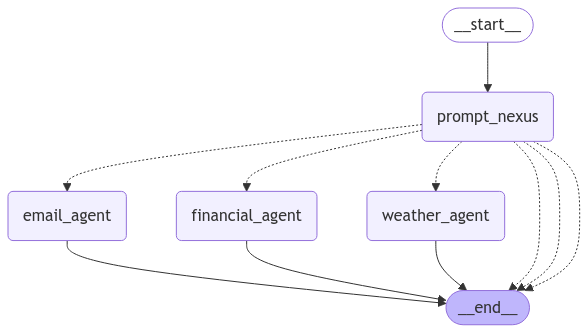

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

graph = graph_builder.compile(checkpointer=memory) # ADDING MEMORY

graph

## Chat With Your Graph

In [ ]:
from langchain_core.messages import HumanMessage

while True:

    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    config = {'configurable': {'thread_id': '1'}}

    # response = graph.invoke({'messages': ('user', user_input)})
    response = graph.invoke({'messages': ('user', user_input)}, config=config)

    print('Assistant: ', response['messages'][-1].content)
    print('-' * 50)

User: hi I am moose from atlanta
Assistant:  Hi Moose from Atlanta! How can I assist you today?
--------------------------------------------------
User: send an email to moose ... tell him: Whatup dawwgh! This was sent by and AI Agent
Assistant:  The email has been sent to Moose at htmlfive.dev@gmail.com.
--------------------------------------------------
User: what is the financial status of google
Assistant:  The current financial status of Google indicates a setback, as they have just lost a lawsuit. This could have implications on their financial standing, but for more detailed and specific financial metrics, it would be best to consult their latest financial reports or news updates.
--------------------------------------------------
User: how about openai status?
Assistant:  OpenAI is currently financially sound and is reportedly improving its financial standing. This positive outlook suggests stability and growth in their operations and financial health.
-------------------------